In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [2]:
folder_path = 'scalone_dane'

In [3]:
city_list = []

In [4]:
cities = {}

In [5]:
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Usunięcie z nazwy pliku ostatnich 12 znaków, aby pozostała tylko nazwa miasta
        # (np. "Warszawa_2020.csv" -> "Warszawa")
        miasto = filename[:-12]

        # Dodanie nazwy miasta do listy miast
        city_list.append(miasto)

        # Utworzenie pełnej ścieżki do pliku CSV
        file_path = os.path.join(folder_path, filename)

        # Wczytanie danych z pliku CSV do DataFrame
        df = pd.read_csv(file_path)

        # Przechowanie DataFrame w słowniku pod kluczem nazwy miasta
        cities[miasto] = df


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
cities['Wiedeń'].head(5)

STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  11035099999  1952-01-01     48.25  16.366667      200.0   
1  11035099999  1952-01-05     48.25  16.366667      200.0   
2  11035099999  1952-01-06     48.25  16.366667      200.0   
3  11035099999  1952-01-09     48.25  16.366667      200.0   
4  11035099999  1952-01-11     48.25  16.366667      200.0   

                  NAME  TEMP  TEMP_ATTRIBUTES  DEWP  DEWP_ATTRIBUTES     SLP  \
0  WIEN HOHE WARTE, AU  38.0                4  34.0                4  1012.8   
1  WIEN HOHE WARTE, AU  35.7                4  27.2                4  1021.0   
2  WIEN HOHE WARTE, AU  33.0                4  27.0                4  1033.2   
3  WIEN HOHE WARTE, AU  33.8                4  27.8                4  1022.5   
4  WIEN HOHE WARTE, AU  42.0                4  33.8                4   992.5   

   SLP_ATTRIBUTES    STP  STP_ATTRIBUTES  VISIB  VISIB_ATTRIBUTES  WDSP  \
0               4  999.9               0    3.6                 4   3.7   
1               4  999.9               0    8.2                 4  12.7   
2               4  999.9               0    6.1                 4   9.0   
3               4  999.9               0    3.2                 4   1.0   
4               4  999.9               0    9.3                 4   4.0   

   WDSP_ATTRIBUTES  MXSPD   GUST   MAX MAX_ATTRIBUTES   MIN MIN_ATTRIBUTES  \
0                4   15.0  999.9  45.0                 34.0              *   
1                4   22.9  999.9  41.0                 34.0                  
2                4   14.0  999.9  36.0              *  32.0              *   
3                4    1.9  999.9  41.0              *  30.0              *   
4                4    8.9  999.9  48.0              *  34.0                  

    PRCP PRCP_ATTRIBUTES   SNDP  FRSHTT  Year  
0   0.08               E  999.9   10000  1952  
1   0.04               F  999.9    1000  1952  
2  99.99                  999.9    1000  1952  
3   0.00               I  999.9  100000  1952  
4   0.02               E  999.9   10000  1952

In [8]:
# Konwersja daty na typ datetime
for city in city_list:
    cities[city]['DATE'] = pd.to_datetime(cities[city]['DATE'], errors='coerce')

# Opis kolumn

- STATION: unikalny identyfikator stacji meteorologicznej
- DATE: data obserwacji w formacie YYYY-MM-DD
- LATITUDE: szerokość geograficzna stacji (w stopniach)
- LONGITUDE: długość geograficzna stacji (w stopniach)
- ELEVATION: wysokość nad poziomem morza (m.n.p.m)
- NAME: pełna nazwa stacji meteorologicznej
- TEMP: średnia temperatura dobowa (°F)
- TEMP_ATTRIBUTES: liczba pomiarów temperatury w ciągu dnia
- DEWP: średnia temperatura punktu rosy w ciągu dnia (°F)
- DEWP_ATTRIBUTES: liczba pomiarów temperatury punktu rosy w ciągu dnia
- SLP: średnie ciśnienie atmosferyczne na poziomie morza w ciągu dnia (milibary)
- SLP_ATTRIBUTES: liczba pomiarów ciśnienia atmosferycznego na poziomie morza w ciągu dnia 
- STP: średnie ciśnienie na stacji meteorologicznej w ciągu dnia (milibary)
- STP_ATTRIBUTES: liczba pomiarów ciśnienie na stacji meteorologicznej w ciągu dnia
- VISIB: średnia widoczność w ciągu dnia (mile)
- VISIB_ATTRIBUTES: liczba pomiarów widoczności w ciągu dnia
- WDSP: średnia prędkość wiatru w ciągu dnia (węzły)
- WDSP_ATTRIBUTES: liczba pomiarów prędkości wiatru w ciągu dnia
- MXSPD: maksymalna utrzymująca się prędkość wiatru zarejestrowana w ciągu dnia (węzły)
- GUST: maksymalny poryw wiatru zarejestrowany w ciągu dnia (węzły)
- MAX: Maksymalna temperatura zarejestrowana w ciągu dnia, wyrażona w stopniach Fahrenheita — czas rejestracji maksymalnej temperatury różni się w zależności od kraju i regionu, więc czasami może to nie być najwyższa temperatura dla całej doby kalendarzowej.
- MAX_ATTRIBUTES: jeżeli w kolumnie jest '*' to mpomiar dla maksymalnej temperatura zarejestrowanej w ciągu dnia był interpolowany lub oszacowany
- MIN: Minimalna temperatura zarejestrowana w ciągu dnia, wyrażona w stopniach Fahrenheita — czas rejestracji minimalnej temperatury różni się w zależności od kraju i regionu, więc czasami może to nie być najniższa temperatura dla całej doby kalendarzowej.
- MIN_ATTRIBUTES: jeżeli w kolumnie jest '*' to pomiar dla minimalnej temperatura zarejestrowanej w ciągu dnia był interpolowany lub oszacowany
- PRCP: Suma opadów (deszcz i/lub roztopiony śnieg) zarejestrowana w ciągu dnia, wyrażona w calach i setnych częściach cala; zazwyczaj nie kończy się na obserwacji o północy — może obejmować również późniejszą część poprzedniego dnia. Wartość 0.00 oznacza brak mierzalnych opadów (wliczając śladowe ilości). Wartość 99.99 oznacza brak danych (Missing).
- PRCP_ATTRIBUTES: liczba pomiarów opadów w ciągu dnia
- SNDP: Głębokość pokrywy śnieżnej wyrażona w calach z dokładnością do dziesiątych części cala — podawana jest ostatnia wartość z danego dnia, jeśli była raportowana więcej niż raz. Brak danych oznaczony jest wartością 999.9. Większość stacji nie raportuje wartości „0” w dni, kiedy na ziemi nie ma śniegu — dlatego często pojawia się wartość 999.9 jako oznaczenie braku danych lub braku śniegu.
- FRSHTT: kod opisujący jakie warunki pogodowe wystąpiły w ciągu dnia.
    - Mgła ('F' – 1. cyfra)
    - Deszcz lub mżawka ('R' – 2. cyfra)
    - Śnieg lub gradówka ('S' – 3. cyfra)
    - Grad ('H' – 4. cyfra)
    - Grzmot/wyładowanie atmosferyczne ('T' – 5. cyfra)
    - Tornado lub lejek powietrzny ('T' – 6. cyfra)

In [9]:
# Sprawdzenie typów danych
cities['Warszawa'].dtypes

STATION                      int64
DATE                datetime64[ns]
LATITUDE                   float64
LONGITUDE                  float64
ELEVATION                  float64
NAME                        object
TEMP                       float64
TEMP_ATTRIBUTES              int64
DEWP                       float64
DEWP_ATTRIBUTES              int64
SLP                        float64
SLP_ATTRIBUTES               int64
STP                        float64
STP_ATTRIBUTES               int64
VISIB                      float64
VISIB_ATTRIBUTES             int64
WDSP                       float64
WDSP_ATTRIBUTES              int64
MXSPD                      float64
GUST                       float64
MAX                        float64
MAX_ATTRIBUTES              object
MIN                        float64
MIN_ATTRIBUTES              object
PRCP                       float64
PRCP_ATTRIBUTES             object
SNDP                       float64
FRSHTT                       int64
Year                

# Obsługa i zamiana wartości brakujących

W celu poprawnego przetworzenia danych pogodowych dokonano zamiany wartości oznaczających brakujące pomiary na standardowe wartości `NaN` lub inne odpowiednie wartości numeryczne.  

---

## Szczegóły procesu

- W danych meteorologicznych występują specjalne wartości liczbowe (np. 9999.9, 999.9, 99.99), które zgodnie z dokumentacją danych oznaczają brak pomiaru lub dane niezgodne z pomiarem.  
- Wartości te zostały zastąpione przez `NaN` w większości kolumn, co pozwala na prawidłowe uwzględnienie braków podczas analizy i obliczeń statystycznych.  

---

## Wyjątki dotyczące opadów i pokrywy śnieżnej

- W przypadku kolumn dotyczących **opadów (PRCP)** oraz **grubości pokrywy śnieżnej (SNDP)**, wartości oznaczające brak pomiaru (odpowiednio 99.99 i 999.9) zostały zastąpione zerem (`0.0`).  
- Takie postępowanie jest zgodne z dokumentacją danych, ponieważ często brak danych w tych polach wynika z sytuacji, gdy faktycznie nie wystąpiły opady lub śnieg.  

---

## Podsumowanie

Dzięki takiej zamianie wartości brakujących, dane są lepiej przygotowane do dalszej analizy, unikając błędnej interpretacji wartości zastępczych jako rzeczywistych pomiarów.


In [10]:
def replace_missing_values(cities, city_list):
    """
    Zastępuje wartości reprezentujące brakujące dane odpowiednimi wartościami NaN lub zerem.
    
    Parametry:
    ----------
    cities : dict
        Słownik, gdzie kluczem jest nazwa miasta, a wartością DataFrame z danymi pogodowymi.
    city_list : list
        Lista nazw miast do przetworzenia.
    
    Zwraca:
    --------
    dict
        Zaktualizowany słownik cities z poprawionymi wartościami brakującymi.
    """
    # Mapa wartości brakujących — wartości które mają zostać zastąpione NaN
    missing_map = {
        'TEMP': 9999.9,
        'DEWP': 9999.9,
        'MAX': 9999.9,
        'MIN': 9999.9,
        'SLP': 9999.9,
        'STP': 9999.9,
        'VISIB': 999.9,
        'WDSP': 999.9,
        'MXSPD': 999.9,
        'GUST': 999.9
    }
    
    for city in city_list:
        # Tworzymy kopię DataFrame dla miasta, aby nie modyfikować oryginału bezpośrednio
        df = cities[city].copy()
        
        # Zamieniamy standardowe wartości brakujące na NaN
        for col, missing_val in missing_map.items():
            if col in df.columns:
                df[col] = df[col].replace(missing_val, np.nan)
        
        # Dla kolumn PRCP i SNDP brakujące wartości zamieniamy na 0.0
        if 'PRCP' in df.columns:
            df['PRCP'] = df['PRCP'].replace(99.99, 0.0)
        if 'SNDP' in df.columns:
            df['SNDP'] = df['SNDP'].replace(999.9, 0.0)
        
        # Aktualizujemy słownik cities nowymi danymi z poprawionymi wartościami brakującymi
        cities[city] = df

    return cities


In [11]:
# Zamian wartości brakujących
cities = replace_missing_values(cities, city_list)

In [12]:
def summarize_nans(cities, city_list):
    """
    Tworzy podsumowanie liczby wartości brakujących (NaN) dla każdej kolumny w danych poszczególnych miast.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi jako wartościami.
    city_list : list
        Lista nazw miast do uwzględnienia w podsumowaniu.

    Zwraca:
    --------
    pd.DataFrame
        DataFrame, w którym wiersze to nazwy kolumn, a kolumny to nazwy miast.
        Komórki zawierają liczbę brakujących wartości (NaN) w danej kolumnie dla danego miasta.
        Pokazane są tylko kolumny z co najmniej jedną wartością NaN; pozostałe mają zero.
    """
    summary = {}
    
    for city in city_list:
        df = cities[city]  # Pobierz dane dla miasta
        
        # Oblicz liczbę NaN w każdej kolumnie
        nan_counts = df.isna().sum()
        
        # Zapisz tylko kolumny, gdzie występują wartości NaN (liczba > 0)
        summary[city] = nan_counts[nan_counts > 0]
    
    # Utwórz DataFrame z podsumowaniem, wypełnij brakujące wartości zerami i skonwertuj na int
    summary_df = pd.DataFrame(summary).fillna(0).astype(int)
    
    return summary_df


In [13]:
# Oblicznie wartości brakujących
summary_nan = summarize_nans(cities, city_list)

In [14]:
summary_nan

Ateny  Berlin  Bruksela  Budapeszt  Lisbona  Londyn  Madryd  Moskwa  \
DEWP       0       4       237          1       21      22       0     517   
GUST    4998   19675     14711      18267    10586   11476   11698   23201   
MAX        0       9         1          4        0       0       4      26   
MIN        0       8         1          0        0       0       0      25   
MXSPD      0       6         5          2       44      26     147     404   
SLP     7295    8301     13928          0      360       8   14349    1865   
VISIB    189       0       136       1640     4313    2686     592    3847   
WDSP       0       0         0          0       37       0       0     192   

       Paryż  Praga  Warszawa  Wiedeń  
DEWP    1169   1442        46      26  
GUST   10240  18265     19216   20064  
MAX        0     17        11       9  
MIN        0     14        11      16  
MXSPD     25     64        41      33  
SLP       24  12803     14037      28  
VISIB    372    243       261      39  
WDSP      23     23        22      19

# Podsumowanie brakujących wartości (NaN) w danych meteorologicznych

Tabela prezentuje liczbę wartości brakujących (NaN) w poszczególnych kolumnach danych dla wybranych miast. Dane dotyczą różnych atrybutów pogodowych i pokazują, jak często brakowały pomiary w każdej lokalizacji.

---

## Interpretacja wyników

- **DEWP (punkt rosy)** – największa liczba braków występuje w Pradze (1442) oraz Moskwie (517). Inne miasta mają mniejsze lub zerowe ilości braków.  
- **GUST (porywy wiatru)** – praktycznie wszystkie miasta mają bardzo dużo braków, np. ponad 20 tysięcy w Moskwie i Wiedniu. To sugeruje, że pomiary porywów wiatru były często niedostępne.  
- **MAX i MIN (maksymalna i minimalna temperatura)** – w większości miast liczba braków jest niska, co świadczy o stosunkowo pełnych pomiarach temperatury. Najwięcej braków jest w Moskwie i Pradze (do 26).  
- **MXSPD (maksymalna prędkość wiatru)** – niewielka liczba braków w większości miast, z wyjątkiem Moskwy (404) i Madrytu (147).  
- **SLP (ciśnienie na poziomie morza)** – sporo braków w takich miastach jak Bruksela (13928), Warszawa (14037) czy Berlin (8301). Niektóre miasta, np. Budapeszt, mają ich prawie wcale.  
- **VISIB (widzialność)** – duża liczba braków w Lizbonie (4313), Moskwie (3847) i Madrycie (592), podczas gdy w Berlinie nie ma braków.  
- **WDSP (średnia prędkość wiatru)** – relatywnie mało braków, choć pojawiają się mniejsze ilości w kilku miastach, np. Moskwie (192) czy Lizbonie (37).

---

## Wnioski

- Dane dotyczące wiatru, zwłaszcza porywów (GUST), mają znaczące luki we wszystkich lokalizacjach, co może wpłynąć na analizy związane z wiatrem.  
- Pomiar temperatury jest generalnie dobrze zachowany, co pozwala na wiarygodne analizy tych zmiennych.  
- Niektóre zmienne, jak ciśnienie czy widzialność, wykazują znaczne braki w określonych miastach, co należy uwzględnić przy dalszych analizach.  

Takie zestawienie pomaga zidentyfikować obszary, gdzie dane wymagają szczególnej uwagi lub uzupełnienia przed przeprowadzeniem szczegółowych analiz.


In [15]:
def convert_units(cities, city_list):
    """
    Konwertuje jednostki miar w danych meteorologicznych dla podanych miast.

    Parametry:
    ----------
    cities : dict
        Słownik, gdzie kluczami są nazwy miast, a wartościami pandas DataFrame z danymi pogodowymi.
    city_list : list
        Lista nazw miast, dla których mają zostać dokonane konwersje jednostek.

    Działanie:
    ----------
    - Temperatura (°F) konwertowana jest na stopnie Celsjusza (°C).
    - Widoczność (mile) konwertowana jest na kilometry (km).
    - Prędkości wiatru (węzły) konwertowane są na km/h.
    - Opady i pokrywa śnieżna (cale) konwertowane są na milimetry (mm).

    Zwraca:
    --------
    dict
        Zaktualizowany słownik `cities` z przeliczonymi jednostkami.
    """
    for city in city_list:
        df = cities[city].copy()

        # Konwersje temperatury: °F -> °C
        for col in ['TEMP', 'DEWP', 'MAX', 'MIN']:
            if col in df.columns:
                df[col] = (df[col] - 32) * 5.0 / 9.0

        # Widoczność: mile -> km
        if 'VISIB' in df.columns:
            df['VISIB'] = df['VISIB'] * 1.60934

        # Prędkość wiatru: węzły -> km/h
        for col in ['WDSP', 'MXSPD', 'GUST']:
            if col in df.columns:
                df[col] = df[col] * 1.852

        # Opady i pokrywa śnieżna: cale -> mm
        for col in ['PRCP', 'SNDP']:
            if col in df.columns:
                df[col] = df[col] * 25.4

        # Zapisz zaktualizowany DataFrame z powrotem do słownika
        cities[city] = df

    return cities


In [16]:
# Konwersja jednostek
cities = convert_units(cities, city_list)

# Konwersja jednostek w danych meteorologicznych

W celu ujednolicenia i uproszczenia dalszej analizy, dokonano konwersji jednostek pomiarowych w zbiorze danych klimatycznych.

---

## Szczegóły konwersji

- **Temperatura**  
  Wartości temperatury, pierwotnie podawane w stopniach Fahrenheita (°F), zostały przeliczone na stopnie Celsjusza (°C) według wzoru:  
  $$ °C = (°F - 32) \times \frac{5}{9} $$

- **Widoczność**  
  Dane o widoczności zapisane w milach zostały przeliczone na kilometry (km) z użyciem współczynnika:  
  $$ 1\ \text{mila} = 1.60934\ \text{km} $$

- **Prędkość wiatru**  
  Prędkości wiatru, począwszy od średniej prędkości (WDSP), przez maksymalną prędkość (MXSPD) aż po porywy wiatru (GUST), które były podane w węzłach, zostały przeliczone na kilometry na godzinę (km/h) zgodnie z przelicznikiem:  
  $$ 1\ \text{węzeł} = 1.852\ \text{km/h} $$

- **Opady i pokrywa śnieżna**  
  Ilości opadów (PRCP) oraz grubość pokrywy śnieżnej (SNDP) podawane w calach zostały przeliczone na milimetry (mm) z wykorzystaniem współczynnika:  
  $$ 1\ \text{cal} = 25.4\ \text{mm} $$

---

## Podsumowanie

Konwersja jednostek umożliwia porównywanie i analizowanie danych meteorologicznych w standardowych i powszechnie stosowanych jednostkach metrycznych, co znacznie ułatwia interpretację i wizualizację wyników.


In [17]:
def plot_avg_parameter(cities, city_list, parameter, ylabel, title):
    """
    Tworzy wykres liniowy średnich rocznych wartości wybranego parametru pogodowego dla podanych miast.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi meteorologicznymi.
    city_list : list
        Lista nazw miast, których dane mają zostać przedstawione na wykresie.
    parameter : str
        Nazwa kolumny (parametru), dla którego liczone są średnie roczne wartości.
    ylabel : str
        Etykieta osi Y na wykresie.
    title : str
        Tytuł wykresu.

    Działanie:
    ----------
    Dla każdego miasta wylicza średnią roczną wartość zadanego parametru i rysuje linię na wykresie.
    """
    plt.figure(figsize=(12, 6))
    # Ustawienie palety kolorów na tyle, ile jest miast
    palette = sns.color_palette("tab20", n_colors=len(city_list))

    for i, city in enumerate(city_list):
        df = cities[city]
        # Ekstrakcja roku z kolumny 'DATE'
        df['Year'] = pd.to_datetime(df['DATE']).dt.year
        # Grupowanie po roku i wyliczenie średniej dla parametru
        yearly_avg = df.groupby('Year')[parameter].mean()
        
        # Rysowanie wykresu liniowego średnich rocznych wartości
        plt.plot(yearly_avg.index, yearly_avg.values, label=city, color=palette[i])
    
    plt.title(title)
    plt.xlabel('Rok')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


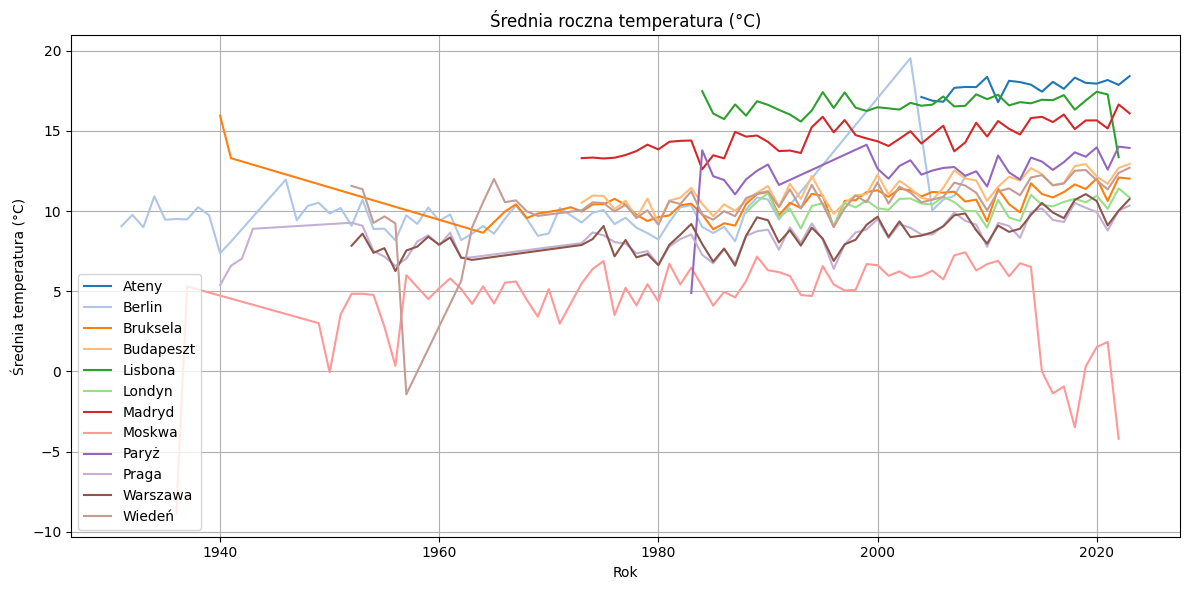

In [18]:
# Średnia temperatura (°C)
plot_avg_parameter(cities, city_list, 'TEMP', 'Średnia temperatura (°C)', 'Średnia roczna temperatura (°C)')

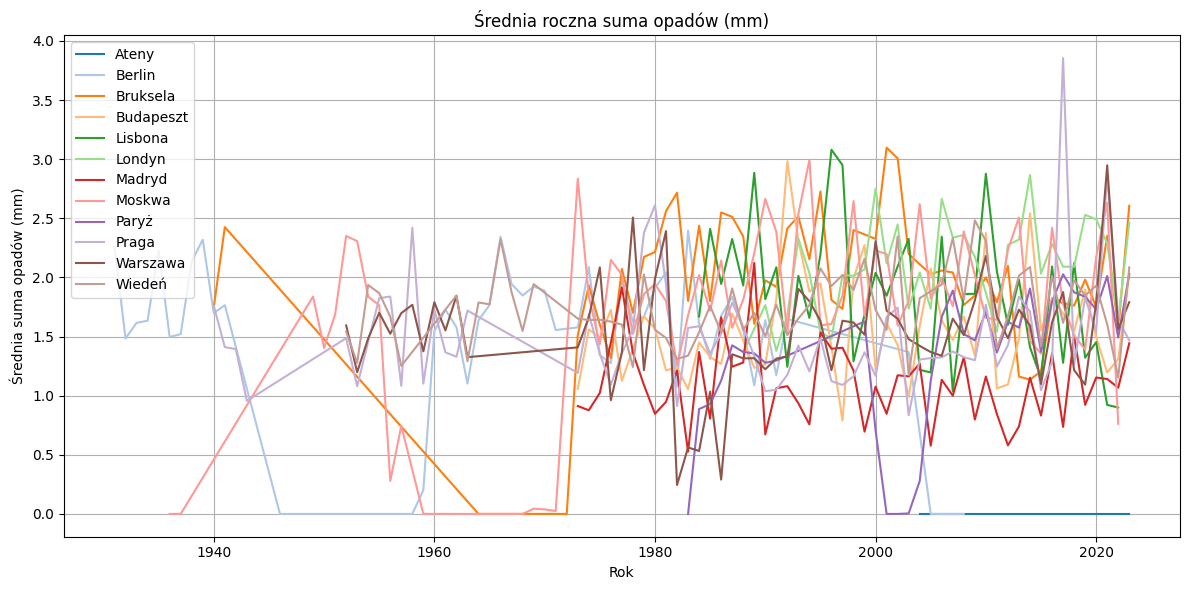

In [19]:
# Suma opadów (mm)
plot_avg_parameter(cities, city_list, 'PRCP', 'Średnia suma opadów (mm)', 'Średnia roczna suma opadów (mm)')

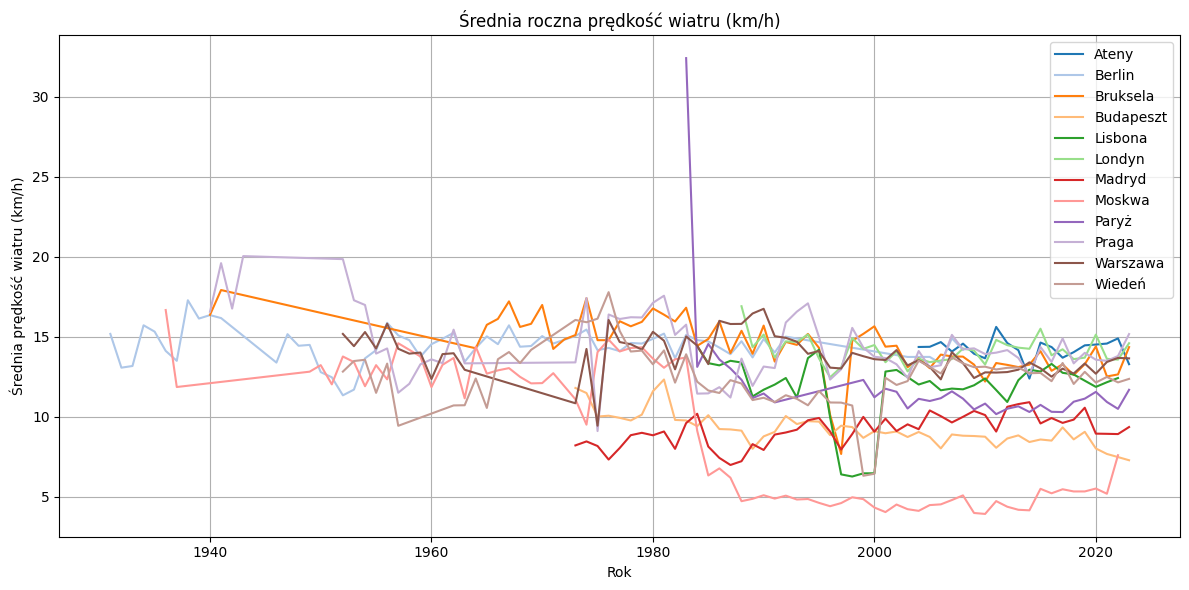

In [20]:
# Średnia prędkość wiatru (km/h)
plot_avg_parameter(cities, city_list, 'WDSP', 'Średnia prędkość wiatru (km/h)', 'Średnia roczna prędkość wiatru (km/h)')

# Analiza jakości danych meteorologicznych

#💧 Średnia roczna suma opadów (mm)  
Dane o opadach mają poważne problemy z jakością i ciągłością.  
- Ciągłość jest niska, zwłaszcza przed 1980 rokiem, z długimi przerwami w wielu miastach.  
- Ateny wykazują płaską linię zerową w ostatnich latach, co świadczy o brakujących danych.  
- Występują liczne wartości odstające, np. skok w Pradze około 2010 r., prawdopodobnie błąd pomiarowy.  
- Dane są bardzo zmienne, typowe dla opadów, z wartościami średnio między 1 a 2.5 mm.

## 🌬️ Średnia roczna prędkość wiatru (km/h)  
Dane o wietrze są lepszej jakości niż opady, ale nadal zawierają braki i anomalie.  
- Luki występują głównie przed 1980 rokiem, np. Londyn ma dane dopiero od około 1980 r.  
- Ekstremalny skok prędkości w Pradze około 1982 r. (>30 km/h) to najprawdopodobniej błąd.  
- Wiatr jest bardziej stabilny, większość miast ma średnie 10–15 km/h, Moskwa najniższe wartości poniżej 10/h.  

## 🌡️ Średnia roczna temperatura (°C)  
Najlepsza jakość danych spośród analizowanych zmiennych.  
- Dane są spójne i ciągłe z krótkimi przerwami (np. Berlin).  
- Londyn i Lizbona mają dane dopiero od około 1980 r.  
- Brak wartości odstających, wahania klimatyczne są łagodne i realistyczne.  
- Miasta południowe (Ateny, Lizbona, Madryt) są najcieplejsze (15–20°C), wschodnie i północne (Moskwa, Warszawa) najchłodniejsze, pozostałe plasują ę pośrodku.  

## 💡 Podsumowanie  
Jakość danych jest różna w zależności od zmiennej. Dane temperaturowe są kompletne i wiarygodne, natomiast opady i wiatr wymagają ostrożności ze względu na luki i błędy. Przy dalszych analizach należy uwzględnić te ograniczenia, szczególnie przy badaniu trendów długoterminowych.
ów długoterminowych.


In [21]:
def plot_annual_min_max_temperatures(cities, city_list):
    """
    Tworzy wykres liniowy pokazujący roczne wartości minimalnej i maksymalnej temperatury dla wybranych miast.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi meteorologicznymi.
    city_list : list
        Lista nazw miast, których dane mają zostać przedstawione na wykresie.

    Działanie:
    ----------
    Dla każdego miasta oblicza roczną minimalną i maksymalną temperaturę oraz rysuje je na wykresie,
    przy czym minimalne temperatury są przedstawione linią przerywaną, a maksymalne ciągłą.
    """
    plt.figure(figsize=(14, 8))
    
    # Pobranie palety kolorów dostosowanej do liczby miast
    palette = sns.color_palette("tab10", len(city_list))
    
    for i, city in enumerate(city_list):
        df = cities[city]
        
        # Grupowanie danych po roku i wyliczenie rocznej minimalnej i maksymalnej temperatury
        annual_min = df.groupby('Year')['MIN'].min()
        annual_max = df.groupby('Year')['MAX'].max()
        
        color = palette[i]
        
        # Wykres rocznej minimalnej temperatury - linia przerywana
        plt.plot(annual_min.index, annual_min.values, label=f'{city} MIN', linestyle='--', color=color)
        # Wykres rocznej maksymalnej temperatury - linia ciągła
        plt.plot(annual_max.index, annual_max.values, label=f'{city} MAX', linestyle='-', color=color)
    
    plt.title('Roczna minimalna i maksymalna temperatura (°C)')
    plt.xlabel('Rok')
    plt.ylabel('Temperatura (°C)')
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.grid(True)
    plt.show()


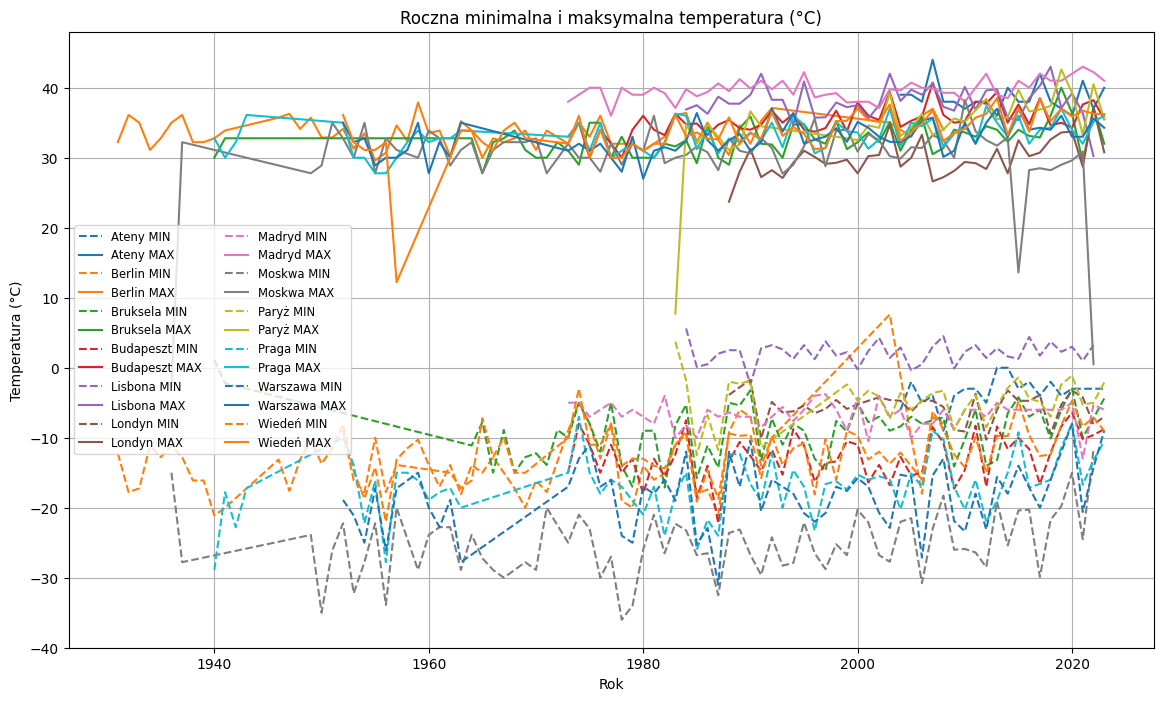

In [22]:
plot_annual_min_max_temperatures(cities, city_list)

### Analiza Trendów w Rocznych Temperaturach Ekstremalnych

Wykres ilustruje długoterminowe zmiany w rocznych ekstremach temperaturowych dla 12 miast Europy. Analiza danych wskazuje na złożone wzorce zmian klimatycznych, wykraczające poza prosty wzrost średniej temperatury.

---

#### 📈 Główne Trendy i Obserwacje

* **Asymetryczne ocieplenie:** Najbardziej znaczącym trendem jest **wzrost zarówno rocznych temperatur maksymalnych, jak i minimalnych**, który przyspieszył od ok. 1980 roku. Kluczową obserwacją jest fakt, że **ocieplenie zim jest bardziej wyraźne niż ocieplenie lat**. Widać to szczególnie na przykładzie **Moskwy**, gdzie linia temperatur minimalnych (linia przerywana) rośnie znacznie szybciej niż linia temperatur maksymalnych. Oznacza to, że zimy stają się łagodniejsze w szybszym tempie, niż lata stają się gorętsze, co prowadzi do zmniejszenia rocznej amplitudy temperatur w niektórych regionach kontynentalnych.

* **Zmiana charakteru ekstremów:**
    * **Fale upałów:** Po 2000 roku widoczna jest **zwiększona częstotliwość i intensywność** ekstremalnie wysokich temperatur maksymalnych. Wiele miast jednocześnie notuje swoje historyczne rekordy ciepła, co wskazuje na rosnące ryzyko synchronicznych fal upałów na kontynencie.
    * **Zanik ekstremalnych mrozów:** Jednocześnie obserwuje się **spadek częstotliwości występowania ekstremalnie niskich temperatur**. Najgłębsze "dołki" na liniach temperatur minimalnych są znacznie rzadsze i płytsze w ostatnich dekadach w porównaniu do lat 1940-1970.

* **Wzorce geograficzne:**
    * **Południe Europy (Ateny, Madryt):** Te miasta regularnie wyznaczają górną granicę letnich ekstremów temperaturowych na kontynencie.
    * **Klimat morski (Lizbona):** Charakteryzuje się ona najwyższymi temperaturami minimalnymi (bardzo łagodne zimy) i stosunkowo niewielką roczną amplitudą temperatur.
    * **Europa kontynentalna (Moskwa, Warszawa):** Miasta te pokazują największą roczną amplitudę i są kluczowymi wskaźnikami szybkiego ocieplania się zim.

---

#### 💡 Wniosek

Dane z wykresu dostarczają silnych dowodów na **postępujące zmiany klimatyczne w Europie**. Nie jest to jedynie prosty wzrost temperatur, ale złożony proces, w którym zimy ocieplają się szybciej niż lata, a charakter zdarzeń ekstremalnych ulega fundamentalnej zmianie – coraz częstsze i silniejsze fale upałów przy jednoczesnym zaniku rekordowych mrozów.strzeni ostatnich dekad.

In [23]:
def decode_frshtt(cities, city_list):
    """
    Dekoduje zakodowaną kolumnę 'FRSHTT' zawierającą informacje o zjawiskach pogodowych 
    na osobne kolumny binarne, wskazujące obecność poszczególnych zjawisk.

    Parametry:
    ----------
    cities : dict
        Słownik, gdzie kluczem jest nazwa miasta, a wartością DataFrame z danymi pogodowymi.
    city_list : list
        Lista miast, które mają zostać poddane dekodowaniu.

    Działanie:
    ----------
    Dla każdej wartości w kolumnie 'FRSHTT' (6-cyfrowy kod) tworzone są osobne kolumny:
    - Fog (mgła)
    - Rain (deszcz)
    - Snow (śnieg)
    - Hail (grad)
    - Thunder (burza)
    - Tornado (tornado)
    W każdej z nich wartość 1 oznacza wystąpienie zjawiska, a 0 jego brak.
    """
    for city in city_list:
        df = cities[city].copy()

        # Zamiana kolumny 'FRSHTT' na 6-cyfrowy string z wiodącymi zerami (np. '000001')
        frshtt_str = df['FRSHTT'].astype(int).astype(str).str.zfill(6)
        
        # Tworzenie nowych kolumn binarnych na podstawie poszczególnych cyfr kodu
        df['Fog'] = frshtt_str.str[0].astype(int)
        df['Rain'] = frshtt_str.str[1].astype(int)
        df['Snow'] = frshtt_str.str[2].astype(int)
        df['Hail'] = frshtt_str.str[3].astype(int)
        df['Thunder'] = frshtt_str.str[4].astype(int)
        df['Tornado'] = frshtt_str.str[5].astype(int)

        # Aktualizacja słownika z danymi o zdekodowanych kolumnach
        cities[city] = df

    return cities


In [24]:
# zdekodowanie zmiennej FRSHTT
cities = decode_frshtt(cities, city_list)

# Dekodowanie zmiennej FRSHTT

W danych meteorologicznych zmienna `FRSHTT` zawiera zakodowane informacje o występowaniu różnych zjawisk pogodowych w formie 6-cyfrowego ciągu cyfr. Każda z cyfr reprezentuje obecność lub brak konkretnego zjawiska w danym dniu.

---

## Struktura kodu `FRSHTT`

Każda z sześciu pozycji odpowiada kolejno:

| Pozycja | Zjawisko |
|---------|-----------|
| 1       | Mgła (Fog) |
| 2       | Deszcz (Rain) |
| 3       | Śnieg (Snow) |
| 4       | Grad (Hail) |
| 5       | Burza (Thunder) |
| 6       | Tornado |

Wartość `1` oznacza wystąpienie danego zjawiska, natomiast `0` jego brak.

---

## Proces dekodowania

- Wartości w kolumnie `FRSHTT` zostały przekonwertowane na 6-cyfrowy ciąg znaków (uzupełniane zerami z lewej strony w przypadku krótszych wartości).
- Następnie dla każdej pozycji w tym ciągu utworzono osobną kolumnę binarną, która przyjmuje wartość `1` lub `0` w zależności od obecności zjawiska.
- Tak powstałe kolumny umożliwiają łatwą analizę i agregację danych dotyczących poszczególnych zjawisk pogodowych.

---

## Korzyści

- Rozdzielenie złożonego kodu na proste zmienne binarne ułatwia eksplorację danych i ich wizualizację.
- Pozwala na szybkie filtrowanie i analizę konkretnych zjawisk pogodowych na podstawie danych historycznych.


In [25]:
def plot_annual_event_counts(cities, city_list, weather_events):
    """
    Tworzy wykresy liniowe pokazujące roczną liczbę dni z wystąpieniem poszczególnych zjawisk pogodowych
    dla wybranych miast.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi meteorologicznymi.
    city_list : list
        Lista nazw miast, których dane mają zostać uwzględnione na wykresach.
    weather_events : list
        Lista nazw kolumn odpowiadających poszczególnym zjawiskom pogodowym (np. 'Fog', 'Rain', 'Snow', ...).

    Działanie:
    ----------
    Dla każdego zjawiska tworzy osobny wykres przedstawiający roczną sumę dni,
    w których zjawisko to wystąpiło, dla każdego miasta z listy.
    """
    # Przygotowanie palety kolorów na liczbę miast
    palette = sns.color_palette("tab20", n_colors=len(city_list))
    
    for event in weather_events:
        plt.figure(figsize=(12, 6))
        
        for i, city in enumerate(city_list):
            df = cities[city]
            
            # Jeśli kolumna 'Year' nie istnieje, tworzymy ją na podstawie kolumny 'DATE'
            if 'Year' not in df.columns:
                df['Year'] = pd.to_datetime(df['DATE']).dt.year
            
            # Grupowanie danych po roku i sumowanie liczby dni, w których wystąpiło dane zjawisko
            yearly_counts = df.groupby('Year')[event].sum()
            
            # Rysowanie linii wykresu dla danego miasta
            plt.plot(yearly_counts.index, yearly_counts.values, label=city, color=palette[i])
        
        plt.title(f'Roczna liczba dni z zjawiskiem: {event}')
        plt.xlabel('Rok')
        plt.ylabel('Liczba dni')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


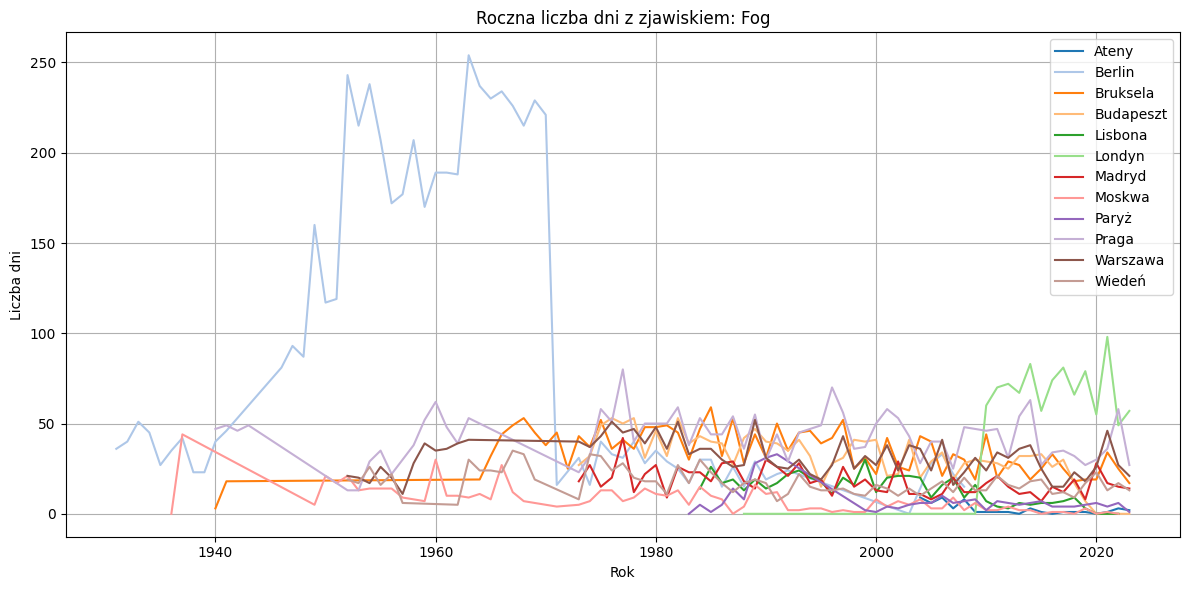

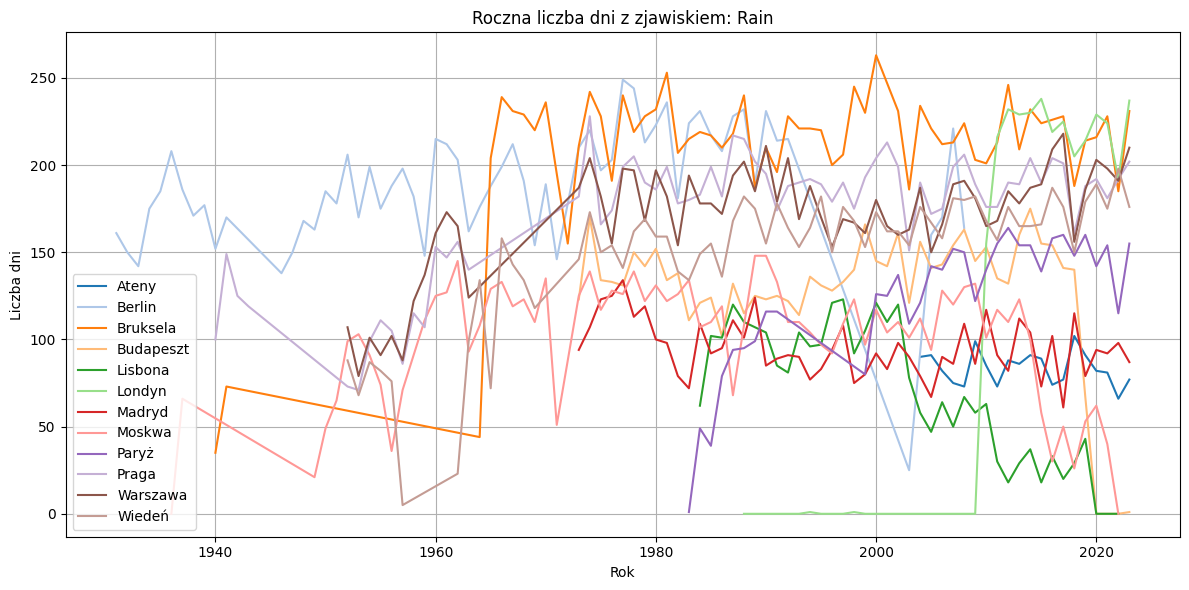

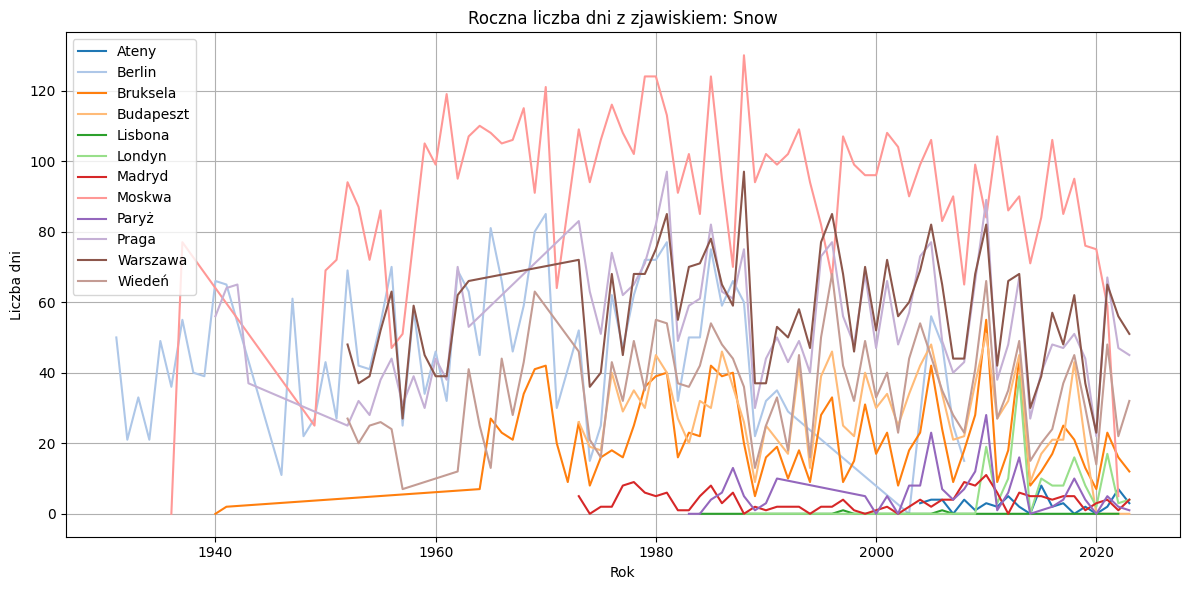

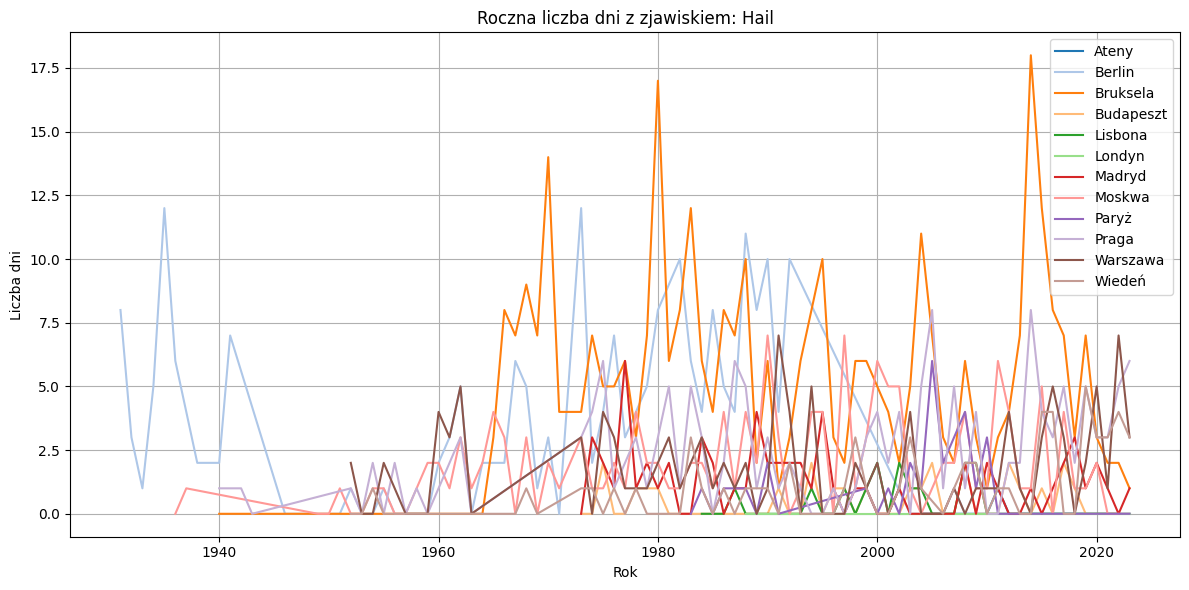

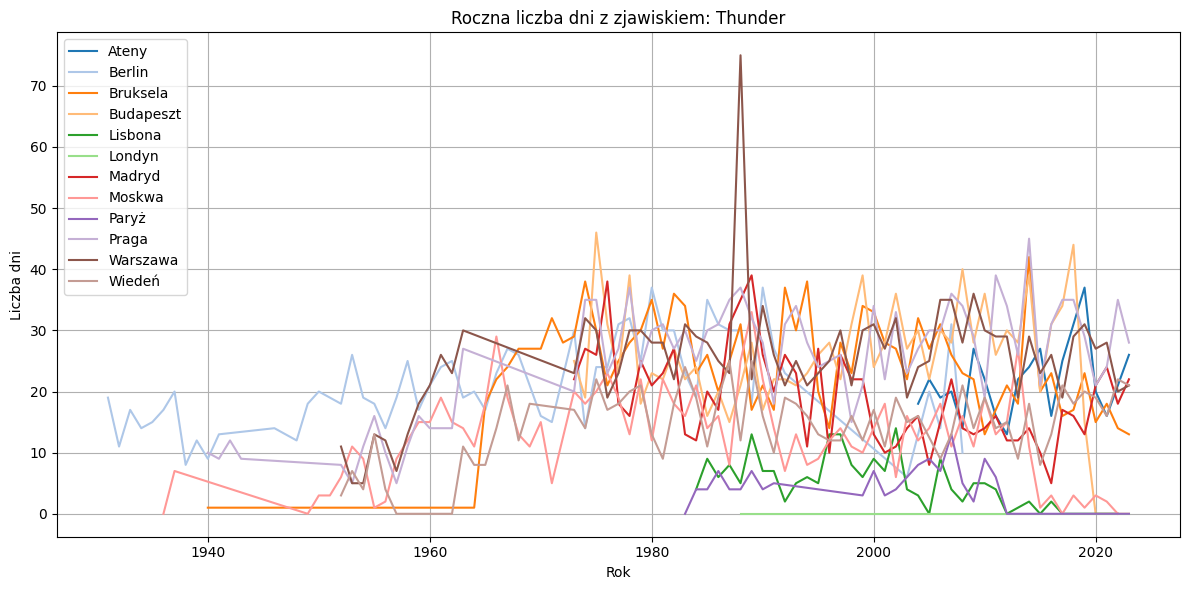

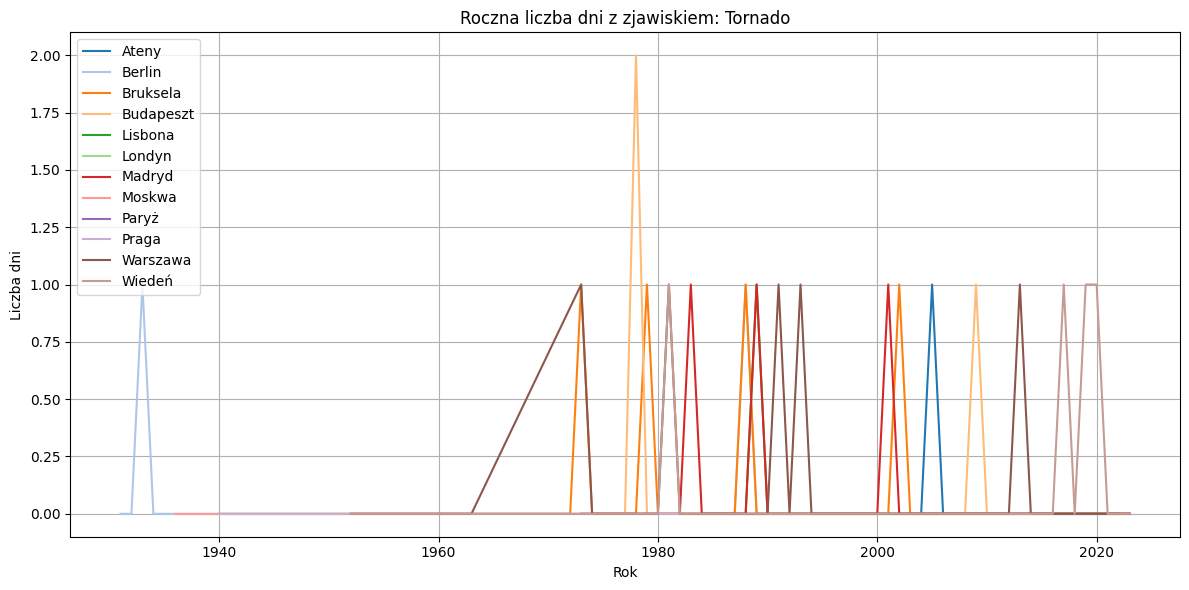

In [26]:
weather_events = ['Fog', 'Rain', 'Snow', 'Hail', 'Thunder', 'Tornado']
plot_annual_event_counts(cities, city_list, weather_events)

# Analiza wykresów

In [27]:
# Zapisanie wspołrzednych geograficznych do słownika
stations_info = {}

for city, df in cities.items():
    lat = df['LATITUDE'].iloc[0]
    lon = df['LONGITUDE'].iloc[0]
    stations_info[city] = {'latitude': lat, 'longitude': lon}
    cities[city] = df.drop(columns=['LATITUDE', 'LONGITUDE'])

In [28]:
# Usunięcie zbędnych kolumn

cols_to_drop = ['LATITUDE', 'LONGITUDE', 'STATION', 'ELEVATION', 'NAME', 'FRSHTT', 'SNDP', 'Tornado', 'Fog', 
                'DEWP_ATTRIBUTES', 'SLP_ATTRIBUTES', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 
                'WDSP_ATTRIBUTES', 'PRCP_ATTRIBUTES']

for city, df in cities.items():
    existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    cities[city] = df.drop(columns=existing_cols_to_drop)

# Zapisanie współrzędnych geograficznych do słownika oraz usunięcie zbędnych kolumn

Współrzędne geograficzne (szerokość i długość geograficzna) dla każdej stacji zostały wyodrębnione z danych i zapisane w osobnym słowniku `stations_info`. Dzięki temu te informacje są łatwo dostępne i nie powtarzają się w każdym DataFrame.

Następnie z danych usunięto kolumny, które nie są potrzebne do dalszej analizy, takie jak metadane stacji (`STATION`, `ELEVATION`, `NAME`), kolumny powiązane z zakodowanymi atrybutami (`FRSHTT`, `DEWP_ATTRIBUTES`, itd.), a także kolumny o niskiej przydatności lub zbyt szczegółowe jak `SNDP` czy `Tornado`. Usunięcie tych kolumn upraszcza zestaw danych i przyspiesza przetwarzanie.


In [29]:
def plot_temp_attr_histograms_per_city(cities, city_list):
    """
    Rysuje histogramy rozkładu wartości w kolumnie 'TEMP_ATTRIBUTES' dla każdego miasta.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi meteorologicznymi.
    city_list : list
        Lista nazw miast, dla których mają zostać wygenerowane histogramy.

    Działanie:
    ----------
    Dla każdego miasta tworzy osobny histogram pokazujący rozkład liczby pomiarów dziennie (wartości 'TEMP_ATTRIBUTES').
    Histogramy są ułożone w siatkę z 3 kolumnami i odpowiednią liczbą wierszy.
    Puste panele w siatce są usuwane, a każdy wykres zawiera tytuł, etykiety osi oraz siatkę.
    """
    n = len(city_list)
    cols = 3
    rows = (n + cols - 1) // cols  # Obliczenie liczby wierszy potrzebnych do wyświetlenia wszystkich miast

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Spłaszczenie tablicy osi do jednowymiarowej listy

    for i, city in enumerate(city_list):
        df = cities[city]
        sns.histplot(
            df['TEMP_ATTRIBUTES'].dropna().astype(int),  # Usunięcie brakujących wartości i konwersja do int
            bins=range(0, 26),                          # Ustawienie zakresu i liczby binów histogramu
            kde=False,
            ax=axes[i],
            color=sns.color_palette("tab20")[i]         # Ustawienie unikalnego koloru dla miasta
        )
        axes[i].set_title(city, fontsize=12)            # Tytuł wykresu z nazwą miasta
        axes[i].set_xlabel("Liczba pomiarów dziennie")  # Etykieta osi X
        axes[i].set_ylabel("Liczba dni")                 # Etykieta osi Y
        axes[i].set_xticks(range(0, 25, 4))              # Ustawienie co czwartego ticka na osi X
        axes[i].grid(True)                                # Włączenie siatki na wykresie

    # Usunięcie pustych paneli, jeśli liczba miast jest mniejsza niż liczba osi
    for j in range(len(city_list), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Histogram TEMP_ATTRIBUTES – liczba pomiarów dziennie (na miasto)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dopasowanie layoutu z pozostawieniem miejsca na tytuł
    plt.show()


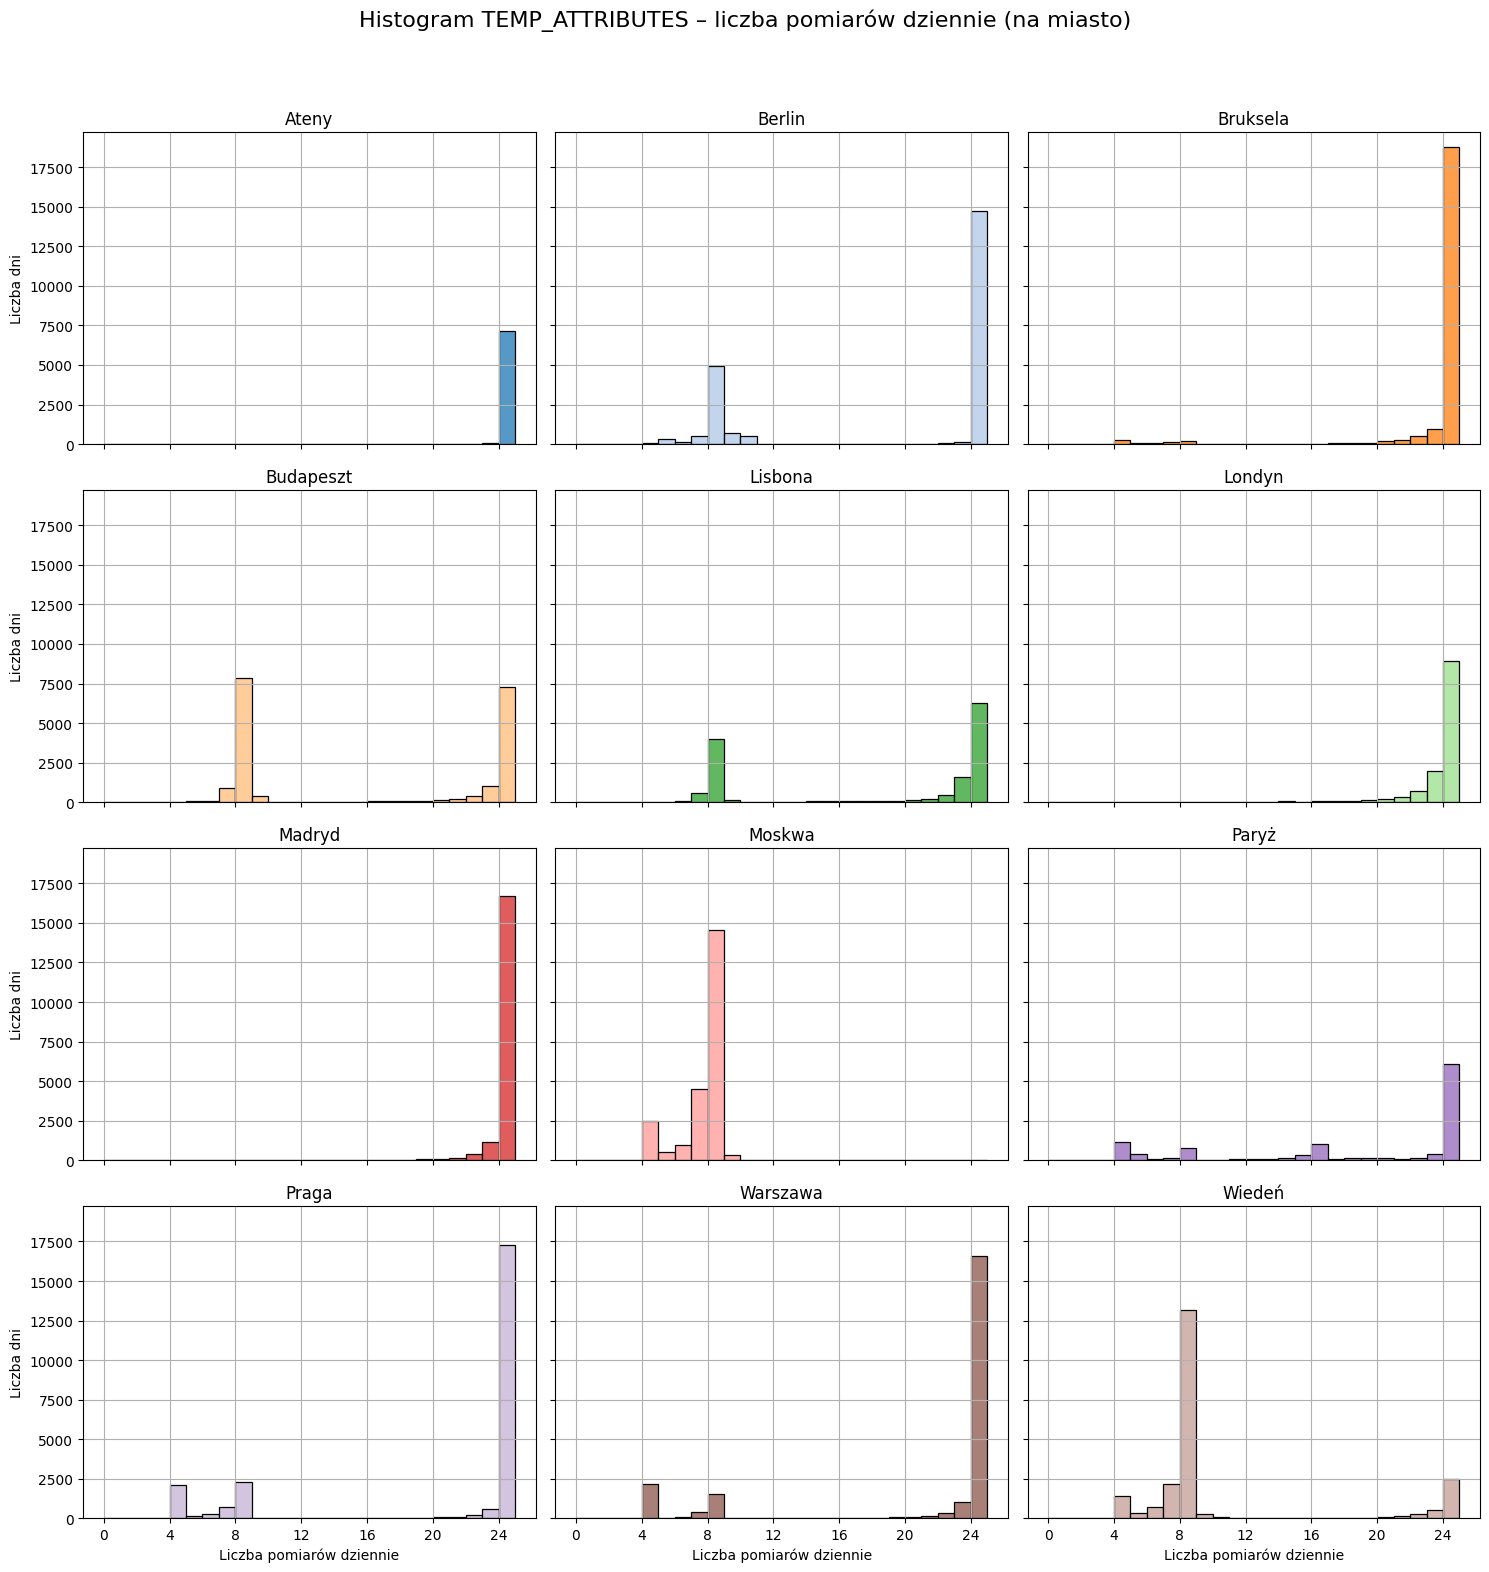

In [30]:
plot_temp_attr_histograms_per_city(cities, city_list)

# Interpretacja Histogramów: Częstotliwość Pomiarów Temperatury

Histogramy pokazują, przez ile dni (oś Y) dokonywano danej liczby pomiarów temperatury na dobę (oś X) w 12 europejskich miastach. Analiza pozwala na wydzielenie trzech głównych grup.

---

## Główne Wzorce Częstotliwości

* **24 pomiary/dzień (co godzinę):** Ten wzorzec dominuje w:
    * **Brukseli, Londynie i Warszawie** (dane bardzo spójne).
    * **Atenach, Budapeszcie i Madrycie** (z niewielkimi anomaliami w niektóre dni).

* **8 pomiarów/dzień (co 3 godziny):** Jest to standard dla:
    * **Berlina, Lizbony, Moskwy i Pragi**.

* **Wzorce mieszane:** Dwa miasta pokazują dwa wyraźne tryby pomiarów (8 i 24 na dobę), co może świadczyć o zmianie metodologii lub łączeniu danych z różnych źródeł:
    * **Paryż i Wiedeń**.

---

##  Wniosek

**Częstotliwość zbierania danych znacząco różni się między miastami.** Ta niejednorodność, zwłaszcza w przypadku Paryża i Wiednia, jest kluczową informacją, którą należy uwzględnić w dalszych analizach, aby zapewnić wiarygodność wyników.

In [31]:
def trim_data_from_1985(cities, city_list):
    """
    Odcina dane meteorologiczne, zachowując tylko rekordy od 1 stycznia 1985 roku wzwyż.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi.
    city_list : list
        Lista miast, dla których dane mają zostać przycięte.

    Zwraca:
    --------
    dict
        Zaktualizowany słownik z przyciętymi danymi dla wskazanych miast.
    """
    start_date = pd.to_datetime("1985-01-01")

    for city in city_list:
        df = cities[city]
        # Konwersja kolumny 'DATE' na datetime
        df['DATE'] = pd.to_datetime(df['DATE'])
        # Filtrowanie danych, pozostawiając tylko wiersze od 1985-01-01 i późniejsze
        df = df[df['DATE'] >= start_date].copy()
        # Aktualizacja słownika
        cities[city] = df

    return cities


In [32]:
# Przycięcie danych
cities = trim_data_from_1985(cities, city_list)

# Przycięcie danych od 1985 roku

Ze względu na słabą ciągłość danych w starszych rekordach oraz brak danych dla wielu stacji w wcześniejszych latach, zdecydowano się ograniczyć analizę do okresu od 1 stycznia 1985 roku. Pozwoliło to na uzyskanie bardziej spójnego i reprezentatywnego zestawu danych do dalszej obróbki i analizy.


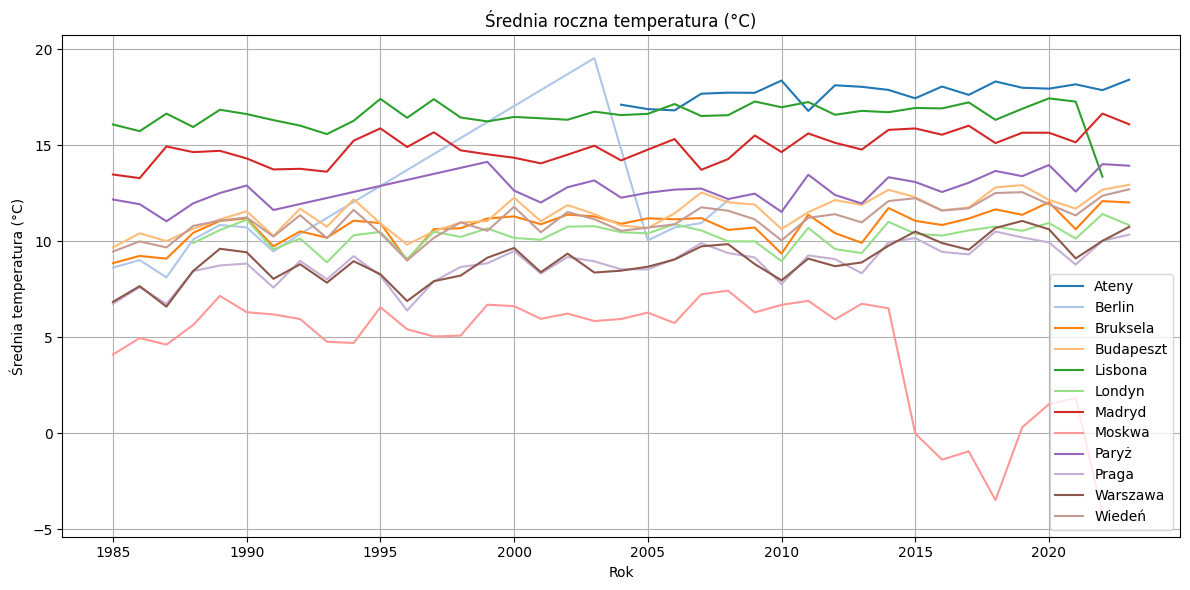

In [33]:
# Wizualizacja danych po przycięciu
# Średnia temperatura (°C)
plot_avg_parameter(cities, city_list, 'TEMP', 'Średnia temperatura (°C)', 'Średnia roczna temperatura (°C)')

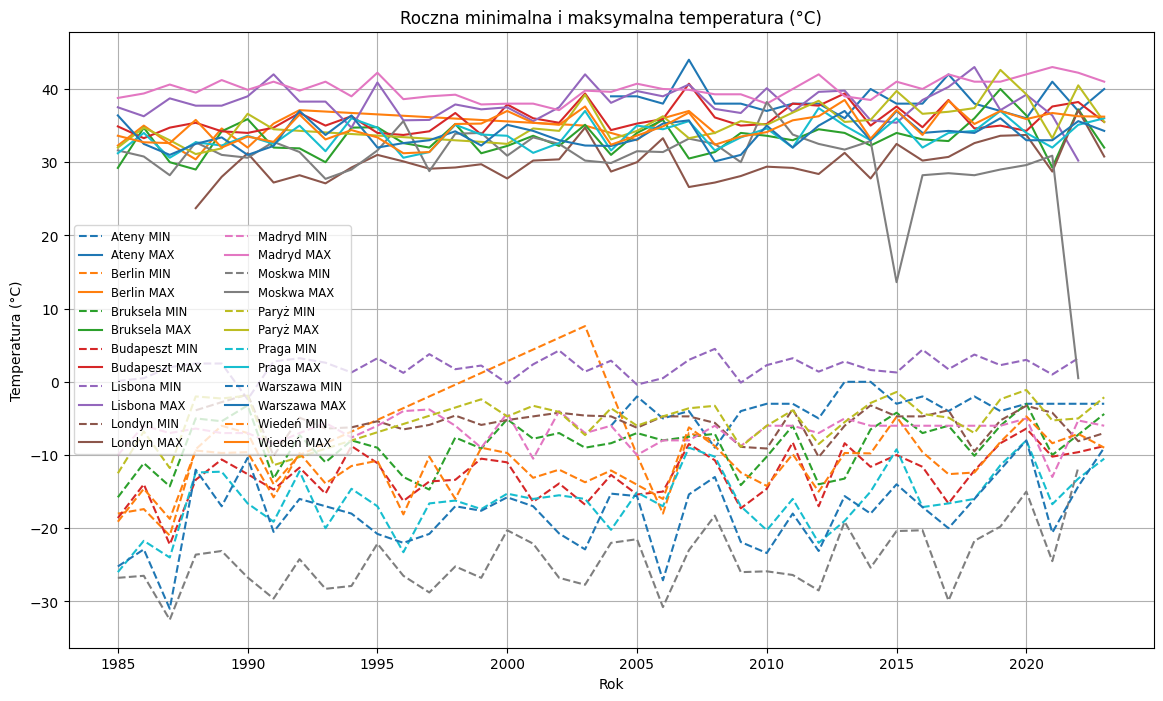

In [34]:
# Maksymalna i minimanlna temperatura
plot_annual_min_max_temperatures(cities, city_list)

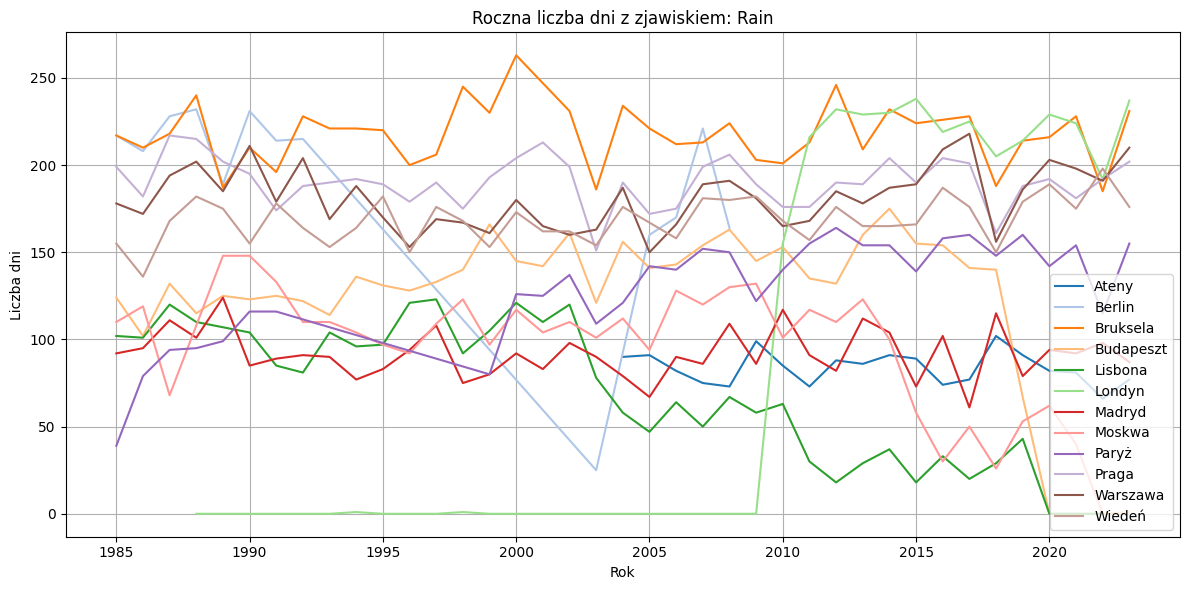

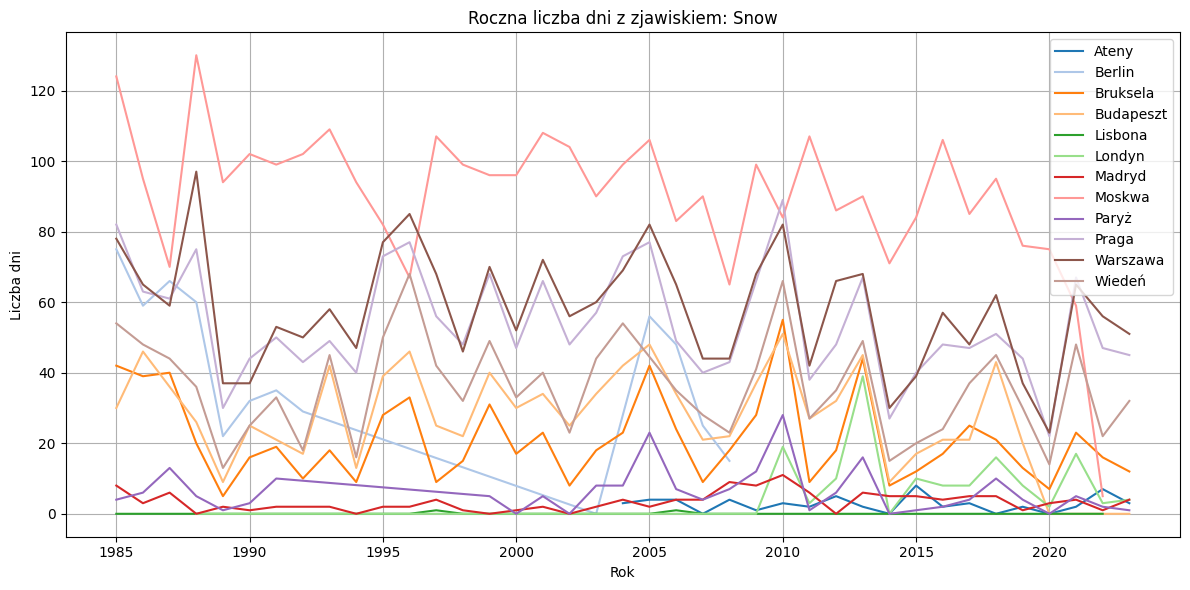

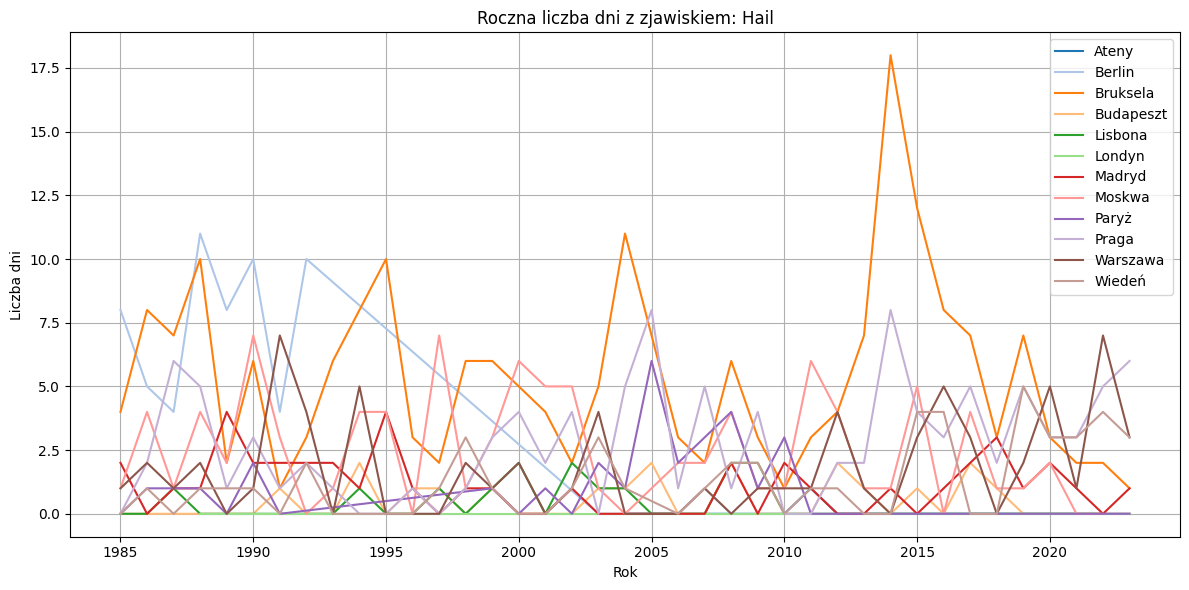

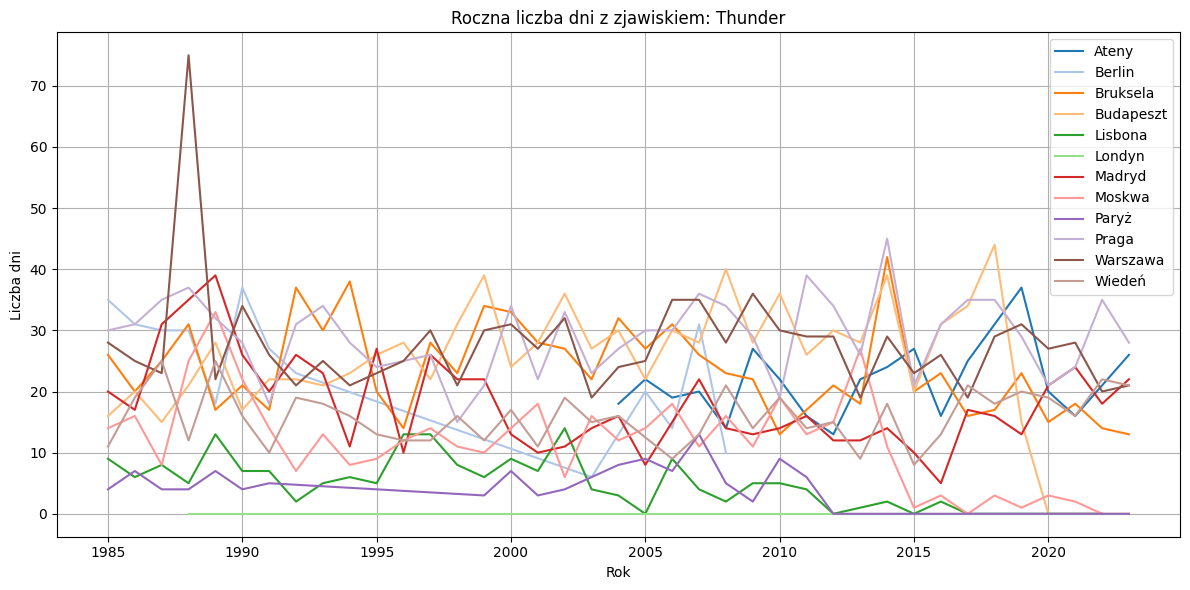

In [35]:
# Zjawiska pogodowe
weather_events = ['Rain', 'Snow', 'Hail', 'Thunder']
plot_annual_event_counts(cities, city_list, weather_events)

In [36]:
summary_nan = summarize_nans(cities, city_list)

In [37]:
summary_nan

Ateny  Berlin  Bruksela  Budapeszt  Lisbona  Londyn  Madryd  Moskwa  \
DEWP       0       0         0          0       21      22       0       1   
GUST    4998    2877      8274      13886    10343   11476    8366   11835   
MAX        0       1         0          0        0       0       1       0   
MIN        0       1         0          0        0       0       0       0   
MXSPD      0       0         4          2       44      26      26     284   
SLP     7295    4309     10886          0      360       8   10540       0   
WDSP       0       0         0          0       37       0       0     145   

       Paryż  Praga  Warszawa  Wiedeń  
DEWP     942      0         1       1  
GUST   10013  10294     11369   12442  
MAX        0      0         1       0  
MIN        0      0         0       0  
MXSPD     24      4         4       3  
SLP       22   8552     10166       1  
WDSP      22      0         0       1

# Braki danych po przycięciu od 1985 roku

Po ograniczeniu zbioru danych do okresu od 1985 roku zaobserwowano znaczące braki w niektórych zmiennych meteorologicznych w wybranych miastach. Poniżej zestawiono liczbę brakujących wartości (NaN) w poszczególnych kolumnach:

- **GUST** – największe braki występują we wszystkich miastach, co sugeruje, że porywy wiatru nie były systematycznie rejestrowane.
- **SLP (ciśnienie na poziomie morza)** – znaczne braki w Atenach, Budapeszcie i Wiedeń; może to wskazywać na brak pomiarów ciśnienia w tych lokalizacjach.
- **MXSPD (maksymalna prędkość wiatru)** oraz **WDSP (średnia prędkość wiatru)** – częściowe braki danych, szczególnie dla Madrytu, Moskwy i Pragi.
- **DEWP (temperatura punktu rosy)** – brak danych w Moskwie i Paryżu może wynikać z lokalnych braków w rejestrowaniu tej zmiennej.
- **MIN/MAX (temperatura minimalna/maksymalna)** – niemal kompletne dane, z wyjątkiem pojedynczych braków w Berlinie, Londynie i Warszawie.

Dane te należy uwzględnić podczas dalszej analizy, ponieważ mogą wpływać na jakość wyników, szczególnie w przypadku analiz statystycznych i trenowania modeli.


In [38]:
def analyze_min_max_attributes(cities, city_list):
    """
    Analizuje informacje o sposobie pozyskania wartości temperatury minimalnej i maksymalnej
    na podstawie kolumn 'MIN_ATTRIBUTES' i 'MAX_ATTRIBUTES' dla każdego miasta.

    Parametry:
    ----------
    cities : dict
        Słownik z nazwami miast jako kluczami i odpowiadającymi DataFrame z danymi pogodowymi.
    city_list : list
        Lista nazw miast, które mają zostać poddane analizie.

    Zwraca:
    -------
    pd.DataFrame
        Podsumowanie zawierające:
        - liczbę wszystkich rekordów MIN/MAX
        - liczbę przypadków, gdzie wartość była wyznaczona ('*')
        - liczbę wartości raportowanych (czyli nie wyznaczonych)
        - procent wartości wyznaczonych w stosunku do całości
    """
    summary = []

    for city in city_list:
        df = cities[city].copy()

        # Analiza MIN_ATTRIBUTES
        total_min = df['MIN_ATTRIBUTES'].notna().sum() + df['MIN_ATTRIBUTES'].isna().sum()  # Wszystkie rekordy (łącznie z NaN)
        derived_min = (df['MIN_ATTRIBUTES'] == '*').sum()  # Liczba wyznaczonych wartości (oznaczonych '*')
        reported_min = total_min - derived_min  # Liczba wartości raportowanych (czyli nie wyznaczonych)

        # Analiza MAX_ATTRIBUTES
        total_max = df['MAX_ATTRIBUTES'].notna().sum() + df['MAX_ATTRIBUTES'].isna().sum()  # Wszystkie rekordy
        derived_max = (df['MAX_ATTRIBUTES'] == '*').sum()  # Liczba wyznaczonych wartości
        reported_max = total_max - derived_max  # Liczba raportowanych wartości

        # Dodanie wyników do listy jako słownik
        summary.append({
            'City': city,
            'Min_Total': total_min,
            'Min_Derived (*)': derived_min,
            'Min_Reported': reported_min,
            'Min_%_Derived': round(100 * derived_min / total_min, 2),
            'Max_Total': total_max,
            'Max_Derived (*)': derived_max,
            'Max_Reported': reported_max,
            'Max_%_Derived': round(100 * derived_max / total_max, 2),
        })

    # Zwrócenie wyników w postaci DataFrame
    return pd.DataFrame(summary)


In [39]:
summary_df = analyze_min_max_attributes(cities, city_list)

In [40]:
summary_df

City  Min_Total  Min_Derived (*)  Min_Reported  Min_%_Derived  \
0       Ateny       7295             7295             0         100.00   
1      Berlin       4370             2980          1390          68.19   
2    Bruksela      14241             7369          6872          51.74   
3   Budapeszt      14236             3189         11047          22.40   
4     Lisbona      13549             4584          8965          33.83   
5      Londyn      12768             4776          7992          37.41   
6      Madryd      14239             5904          8335          41.46   
7      Moskwa      11976             3561          8415          29.73   
8       Paryż      11116             3243          7873          29.17   
9       Praga      14241             5936          8305          41.68   
10   Warszawa      14241             6601          7640          46.35   
11     Wiedeń      13775             2863         10912          20.78   

    Max_Total  Max_Derived (*)  Max_Reported  Max_%_Derived  
0        7295             7295             0         100.00  
1        4370             2565          1805          58.70  
2       14241             5878          8363          41.28  
3       14236             2037         12199          14.31  
4       13549             3397         10152          25.07  
5       12768             4216          8552          33.02  
6       14239             4699          9540          33.00  
7       11976             2459          9517          20.53  
8       11116             2106          9010          18.95  
9       14241             5018          9223          35.24  
10      14241             4655          9586          32.69  
11      13775             1223         12552           8.88

# Analiza pochodzenia danych temperatury minimalnej i maksymalnej

W kolumnach `MIN_ATTRIBUTES` i `MAX_ATTRIBUTES` znajduje się informacja o sposobie pozyskania wartości temperatur minimalnych i maksymalnych. Wartość `*` oznacza, że dana wartość została wyznaczona (np. interpolowana lub oszacowana), natomiast brak `*` oznacza, że wartość została bezpośrednio zmierzona i zarejestrowana (raportowana).

---

## Kluczowe obserwacje:

- **Ateny**: 100% wartości temperatur minimalnych i maksymalnych zostało wyznaczonych, co oznacza brak bezpośrednich pomiarów – dane są w pełni pochodne.
- **Berlin**: Znaczna część wartości (ok. 68% dla temperatury minimalnej i 59% dla maksymalnej) jest wyznaczona, co może wpływać na wiarygodność analizy trendów.
- **Bruksela** i **Warszawa**: Około połowa danych to wartości wyznaczone – co wskazuje na umiarkowaną jakość danych.
- **Budapeszt**, **Wiedeń**, **Moskwa** i **Paryż**: Posiadają najwyższy odsetek bezpośrednio raportowanych danych – ponad 70–90% danych pochodzi z pomiarów, co czyni je bardziej wiarygodnymi do analiz statystycznych.
- **Londyn**, **Madryt**, **Praga** i **Lisbona**: Wartości pochodne stanowią 25–40%, co oznacza względnie dobrą jakość danych.

---

## Wnioski:

- Wysoki udział danych wyznaczonych (`*`) może wskazywać na braki w oryginalnych pomiarach i wpływać na dokładność analiz długoterminowych.
- Dla miast o dużym procencie wartości wyznaczonych (np. Ateny, Berlin), należy zachować ostrożność przy interpretacji trendów temperatur ekstremalnych.
- Miasta z przewagą danych raportowanych są bardziej odpowiednie do zaawansowanych analiz statystycznych i modelowania zmian klimatu.


In [41]:
# Usunięcie kolumn ATTRIBUTES
columns_to_drop = ['TEMP_ATTRIBUTES', 'MAX_ATTRIBUTES', 'MIN_ATTRIBUTES']

for city in cities:
    cities[city] = cities[city].drop(columns=[col for col in columns_to_drop if col in cities[city].columns])

In [42]:
# Zapisanie danych do pliku pickle
with open('climate_data.pkl', 'wb') as f:
    pickle.dump({'cities': cities, 'stations_info': stations_info}, f)

# Podsumowanie wyboru zmiennych do analizy zmian klimatycznych

Po wstępnej analizie danych oraz jakości poszczególnych zmiennych zdecydowano się skoncentrować na następujących kluczowych parametrach meteorologicznych:

- **Temperatura średnia (TEMP)** – reprezentuje podstawową zmienność termiczną w danym dniu.
- **Temperatura maksymalna (MAX)** – pozwala na analizę ekstremów cieplnych.
- **Temperatura minimalna (MIN)** – umożliwia ocenę chłodniejszych warunków i ekstremów zimnych.

Ponadto, do analizy włączono zmienne opisujące występowanie istotnych zjawisk pogodowych, które mają wpływ na klimat i warunki atmosferyczne:

- **Rain** (deszcz)
- **Snow** (śnieg)
- **Hail** (grad)
- **Thunder** (burza)

Wybrane kolumny zapewniają reprezentatywne dane do badania trendów i zmian klimatycznych w miastach na przestrzeni lat.
